Features examples
   alcohol  malic_acid
0    14.23        1.71
1    13.20        1.78
2    13.16        2.36
3    14.37        1.95
4    13.24        2.59


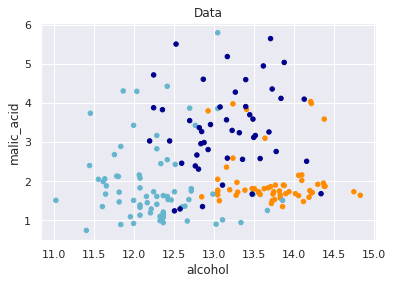

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine

data = load_wine()

X = data.data[:, :2]
y = data.target
m = len(y)
x_names = data.feature_names[:2]
y_names = data.target_names

X_df = pd.DataFrame(X, columns = x_names)

print("Features examples")
print(X_df.head())

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.title("Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

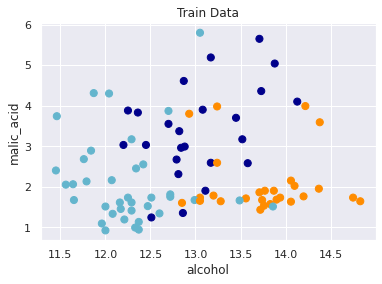

In [3]:
from sklearn.model_selection import train_test_split

#Split into train, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.29, random_state=42)

m_train = len(y_train)
m_val = len(y_val)
m_test = len(y_test)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=50)
plt.title("Train Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Model training and evaluation for each C
# C low -> considered more the margins
# C high -> considered more the outliers -> best with small m

C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
models = []
scores = []

for i in range(len(C_values)):
  models.append(make_pipeline(StandardScaler(), SVC(C=C_values[i], kernel="linear")))
  models[i].fit(X_train, y_train)
  scores.append(models[i].score(X_val, y_val))
  print("C: {}   \tscore: {}".format(C_values[i], scores[i]))

C: 0.001   	score: 0.3611111111111111
C: 0.01   	score: 0.5
C: 0.1   	score: 0.8333333333333334
C: 1.0   	score: 0.8611111111111112
C: 10.0   	score: 0.8611111111111112
C: 100.0   	score: 0.8611111111111112
C: 1000.0   	score: 0.8888888888888888


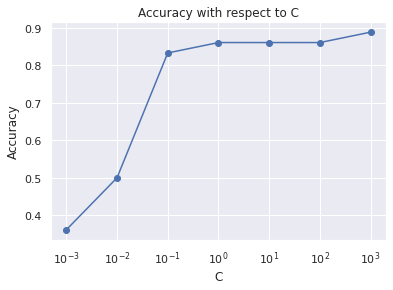

In [5]:
# Results inspections - C
plt.figure()
plt.plot(C_values, scores, marker="o")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect to C")
plt.show()

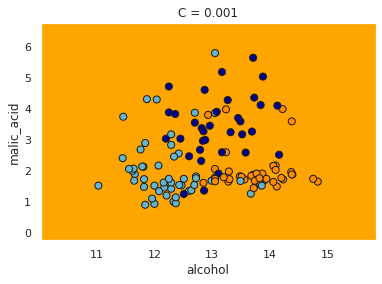

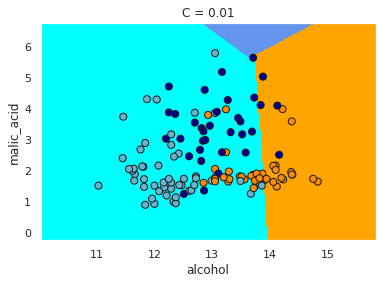

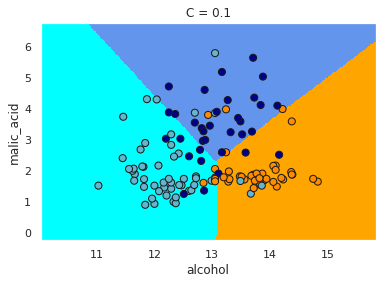

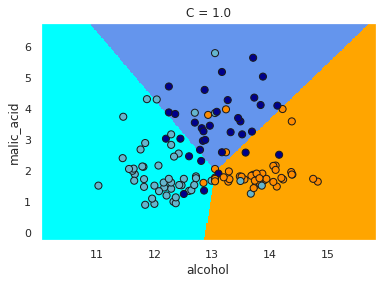

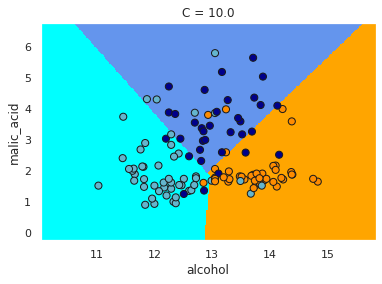

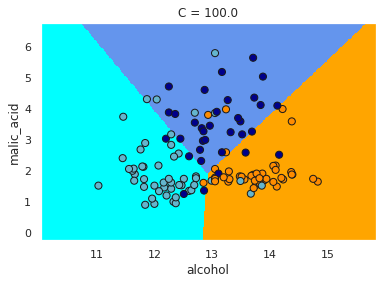

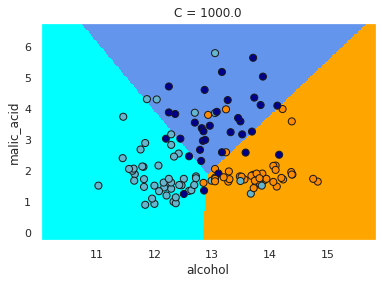

In [6]:
# Results inspections - SVC

# Color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i in range(len(C_values)):
  Z = models[i].predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X_train_val[:, 0], X_train_val[:, 1], c=y_train_val, cmap=cmap_bold, edgecolor='k', s=50)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(x_names[0])
  plt.ylabel(x_names[1])
  plt.title("C = {}".format(C_values[i]))
plt.show()

In [7]:
# Model Evaluation with best C

C = C_values[scores.index(max(scores))]

best_svm = make_pipeline(StandardScaler(), SVC(C=C, kernel="linear"))
best_svm.fit(X_train_val, y_train_val)

before = time.perf_counter()
acc = best_svm.score(X_test, y_test)
after = time.perf_counter()
time_ovr = after - before

print("Best C: {} - accuracy: {:.2f}%".format(C, acc*100))

Best C: 1000.0 - accuracy: 74.07%


OVR policy - accuracy: 74.07% - time: 0.645ms
OVO policy - accuracy: 74.07% - time: 0.897ms


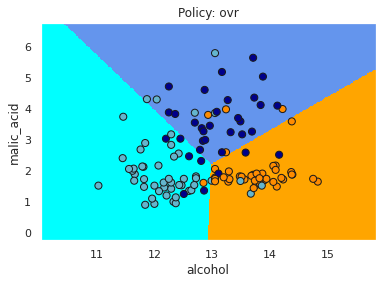

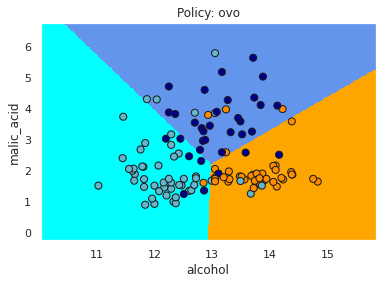

In [8]:
# Decision Function Analysis - One-Versus-Rest vs One-Versus-One

svm_ovo = make_pipeline(StandardScaler(), SVC(C=C, kernel="linear", decision_function_shape='ovo'))
svm_ovo.fit(X_train_val, y_train_val)

before = time.perf_counter()
acc_ovo = svm_ovo.score(X_test, y_test)
after = time.perf_counter()
time_ovo = after - before

print("OVR policy - accuracy: {:.2f}% - time: {:.3f}ms".format(acc*100, time_ovr*1000))
print("OVO policy - accuracy: {:.2f}% - time: {:.3f}ms".format(acc_ovo*100, time_ovo*1000))
# Most of cases ovr faster

for model in [best_svm, svm_ovo]:
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X_train_val[:, 0], X_train_val[:, 1], c=y_train_val, cmap=cmap_bold, edgecolor='k', s=50)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(x_names[0])
  plt.ylabel(x_names[1])
  plt.title("Policy: {}".format(model["svc"].decision_function_shape))
plt.show()